In [8]:
import pandas as pd
from datetime import datetime
from calendar import isleap
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

In [9]:
olist_customers_dataset = pd.read_csv('olist_customers_dataset.csv')
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
#  olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей
# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

In [11]:
olist_orders_dataset = pd.read_csv('olist_orders_dataset.csv')
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# olist_orders_dataset.csv —  таблица заказов
# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

# Уникальные статусы заказов в таблице olist_orders_dataset:
# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю 
# unavailable —  недоступен
# canceled —  отменён

In [13]:
olist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
# olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа
# product_id —  ид товара (аналог штрихкода)
# seller_id — ид производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

In [15]:
# =============================================================

1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [16]:
olist_customers_orders = olist_customers_dataset.merge(olist_orders_dataset, how='outer', on='customer_id')

In [17]:
olist_customers_orders_items = olist_order_items_dataset.merge(olist_customers_orders, how='right', on='order_id')

In [18]:
olist_customers_orders_items.shape # наш исходный датафрейм

(113425, 18)

In [19]:
olist_customers_orders_items.order_id.value_counts() # всего уникальных заказов 99441

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
69923a4e07ce446644394df37a710286     1
621e9c63cf00647b721e1798a1690c74     1
fd9b8ed51e5ffedf7a56bea36cc5b6f9     1
9692f3f8431de918c3daf5fd26a66668     1
cd3181fe74393d54f51abead6ff1abb9     1
Name: order_id, Length: 99441, dtype: int64

In [20]:
# покупкой являются те товары, когда заказ создан клиентом, оплата подтверждена продавцом 
# и этот товар доставлен транспортной компанией пользователю

In [21]:
olist_customers_orders_items.query('order_status == "delivered"').agg({'order_approved_at': 'count'}) 
# всего оплаченых покупок 110182

order_approved_at    110182
dtype: int64

In [22]:
olist_customers_orders_items.query('order_status == "delivered"').groupby('customer_unique_id') \
    .agg({'order_id': 'nunique'})

,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [23]:
# ОТВЕТ:   93358 ПОЛЬЗОВАТЕЛЕЙ СДЕЛАЛИ ПОКУПКУ ОДИН РАЗ

In [24]:
# ============================================================

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [25]:
# сразу меняем тип данных на datetime64 в исходном датафрейме

In [26]:
olist_customers_orders_items.order_delivered_carrier_date = \
    olist_customers_orders_items.order_delivered_carrier_date.astype('datetime64')

In [27]:
olist_customers_orders_items.order_delivered_customer_date = \
    olist_customers_orders_items.order_delivered_customer_date.astype('datetime64')

In [28]:
olist_customers_orders_items.order_estimated_delivery_date = \
    olist_customers_orders_items.order_estimated_delivery_date.astype('datetime64')

In [29]:
# используем order_approved_at —  время подтверждения оплаты заказа. 
# Использовала эту дату так как это означает, что клиент точно его оплатил 
# и ответственность за доставку лежит на продавце и на транспортной компании

order_approved_status = olist_customers_orders_items[['order_approved_at', 'order_status']]

In [30]:
order_approved_status_canceled = order_approved_status.query('order_status == "canceled"')
# фильтруем (за весь период где canceled — отменён)
order_approved_status_canceled.order_approved_at = order_approved_status_canceled.order_approved_at.astype('datetime64')

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
daily_canceled = order_approved_status_canceled.set_index('order_approved_at')
daily_canceled.groupby(pd.Grouper(freq='D'))['order_status'].count()
# ежедневно отменены
monthly_canceled = daily_canceled.groupby(pd.Grouper(freq='M')).count()
# количество отмененных покупок по месяцам
monthly_canceled.head()

,order_status
order_approved_at,
2016-10-31,22
2016-11-30,0
2016-12-31,0
2017-01-31,2
2017-02-28,15


In [37]:
order_approved_status_unavailable = order_approved_status.query('order_status == "unavailable"')

# фильтруем (за весь период где unavailable — недоступен)
order_approved_status_unavailable.order_approved_at = \
    order_approved_status_unavailable.order_approved_at.astype('datetime64')

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
daily_unavailable = order_approved_status_unavailable.set_index('order_approved_at')
daily_unavailable.groupby(pd.Grouper(freq = 'D'))['order_status'].count()
# ежедневно недоступны 
monthly_unavailable = daily_unavailable.groupby(pd.Grouper(freq='M')).count()
# количество недоступных покупок по месяцам
monthly_unavailable.head()

,order_status
order_approved_at,
2016-10-31,7
2016-11-30,0
2016-12-31,0
2017-01-31,8
2017-02-28,47


In [39]:
monthly_canceled.mean()
# в среднем заказов в месяц отменяют

order_status    24.565217
dtype: float64

In [40]:
monthly_unavailable.mean()
# в среднем заказов в месяц недоступны

order_status    26.521739
dtype: float64

In [41]:
# ОТВЕТ: 24.565217 в среднем заказов в месяц отменяют
#        26.521739 в среднем заказов в месяц недоступны

In [42]:
# =============================================================

3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [43]:
# покупкой являются те товары, когда заказ создан клиентом, оплата подтверждена продавцом 
# и этот товар доставлен транспортной компанией пользователю 
# (здесь используем время создания заказа, так как условно с этого момента можно сказать что началась покупка)

# product_id —  ид товара (аналог штрихкода)
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_status == delivered —  доставлен пользователю 

In [44]:
product_purchase_timestamp = olist_customers_orders_items[['product_id', 'order_purchase_timestamp']]
product_purchase_timestamp = product_purchase_timestamp.dropna() 
# удаляем колонки с нулевыми значениями
product_purchase_timestamp['day_of_week']= \
    pd.to_datetime(product_purchase_timestamp['order_purchase_timestamp']).dt.dayofweek
# day_of_week - в какой день был создан заказ
x = product_purchase_timestamp.groupby('product_id').nunique().reset_index() 
# получаем количество уникальных товаров  

In [45]:
x_pivot = x.pivot(index = 'product_id', columns = 'day_of_week', \
                      values = 'order_purchase_timestamp')

# собираем в табличку уникальные товары и в какой день создали заказ,
# пересечение и есть сколько раз сделали заказ в какой день

In [46]:
x_pivot

day_of_week,1,2,3,4,5,6,7
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,1.0,NaN,NaN,NaN,NaN,NaN,NaN
00088930e925c41fd95ebfe695fd2655,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0009406fd7479715e4bef61dd91f2462,1.0,NaN,NaN,NaN,NaN,NaN,NaN
000b8f95fcb9e0096488278317764d19,NaN,2.0,NaN,NaN,NaN,NaN,NaN
000d9be29b5207b54e86aa1b1ac54872,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,NaN,2.0,NaN,NaN,NaN,NaN,NaN
fff81cc3158d2725c0655ab9ba0f712c,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fff9553ac224cec9d15d49f5a263411f,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# ===========================================================

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [48]:
# покупкой являются те товары, когда заказ создан клиентом, оплата подтверждена продавцом 
# и этот товар доставлен транспортной компанией пользователю 
# (здесь используем время создания заказа и статус - доставлен, так как весь цикл покупки будет завершен)


# order_id —  уникальный идентификатор заказа (номер чека)
# order_purchase_timestamp —  время создания заказа
# customer_id —  позаказный идентификатор пользователя
# order_status - статус заказа

In [49]:
# можно найти количество покупок в месяц на каждый месяц и пересчитать на неделю.

In [50]:
customer_order_purchase_timestamp = olist_customers_orders_items[['customer_id', 'order_id', 'order_status', \
                                                                      'order_purchase_timestamp']]
customer_order_purchase_timestamp = customer_order_purchase_timestamp.query('order_status == "delivered"') \
    .groupby(['customer_id', 'order_purchase_timestamp']).agg({'order_id': 'count'}) \
    .sort_values(by = 'order_purchase_timestamp').reset_index()
# оставляем заказы, где создан заказ и статус - доставлен

In [51]:
customer_order_purchase_timestamp

,customer_id,order_purchase_timestamp,order_id
0,86dc2ffce2dfff336de2f386a786e574,2016-09-15 12:16:38,3
1,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,1
2,7ec40b22510fdbea1b08921dd39e63d8,2016-10-03 16:56:50,1
3,6f989332712d3222b6571b1cf5b835ce,2016-10-03 21:13:36,1
4,b8cf418e97ae795672d326288dfab7a7,2016-10-03 22:06:03,1
...,...,...,...
96473,e450a297a7bc6839ceb0cf1a2377fa02,2018-08-29 12:25:59,1
96474,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23,2
96475,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28,1
96476,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00,1


In [52]:
customer_order_purchase_timestamp = customer_order_purchase_timestamp.drop(labels = [0],axis = 0)
# удаляем первый неполный месяц в колонке (одна дата 15.09.2016)

In [53]:
customer_order_purchase_timestamp['order_purchase_timestamp'] = \
    pd.to_datetime(customer_order_purchase_timestamp['order_purchase_timestamp']) 
#меняем тип данных

In [54]:
customer_order_purchase_timestamp['year'] = \
    customer_order_purchase_timestamp['order_purchase_timestamp'].apply(lambda x: x.year)
customer_order_purchase_timestamp['month'] = \
    customer_order_purchase_timestamp['order_purchase_timestamp'].apply(lambda x: x.month)
# новые колонки month и year для каждого клиента

In [56]:
customer_order_purchase_timestamp['week_in_month'] = \
    customer_order_purchase_timestamp.order_purchase_timestamp.dt.days_in_month/7
# узнаем количество дней в каждом месяце, чтобы узнать количество недель (делим на 7)

In [58]:
customer_order_purchase_timestamp['order_in_week_mean'] = \
    customer_order_purchase_timestamp.order_id / customer_order_purchase_timestamp.week_in_month
# делим количество заказов на количество недель в месяце и получаем среднее количество заказов в неделю

In [67]:
customer_order_purchase_timestamp[['customer_id', 'week_in_month', 'order_in_week_mean']]

,customer_id,week_in_month,order_in_week_mean
1,355077684019f7f60a031656bd7262b8,4.428571,0.225806
2,7ec40b22510fdbea1b08921dd39e63d8,4.428571,0.225806
3,6f989332712d3222b6571b1cf5b835ce,4.428571,0.225806
4,b8cf418e97ae795672d326288dfab7a7,4.428571,0.225806
5,7812fcebfc5e8065d31e1bb5f0017dae,4.428571,0.225806
...,...,...,...
96473,e450a297a7bc6839ceb0cf1a2377fa02,4.428571,0.225806
96474,e60df9449653a95af4549bbfcb18a6eb,4.428571,0.451613
96475,6e353700bc7bcdf6ebc15d6de16d7002,4.428571,0.225806
96476,496630b6740bcca28fce9ba50d8a26ef,4.428571,0.225806


In [ ]:
# ==========================================================

5.Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [243]:
# покупкой являются те товары, когда заказ создан клиентом, оплата подтверждена продавцом 
# и этот товар доставлен транспортной компанией пользователю 
# (здесь используем время создания заказа и статус - доставлен, так как весь цикл покупки будет завершен)


# order_id —  уникальный идентификатор заказа (номер чека)
# order_purchase_timestamp —  время создания заказа
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
# order_status - статус заказа

In [68]:
customer_order_purchase_timestamp = olist_customers_orders[['customer_unique_id', 'order_id', 'order_status', \
                                                                      'order_purchase_timestamp']]

customer_order_purchase_timestamp = customer_order_purchase_timestamp.query('order_status == "delivered"')

# оставляем заказы, где создан заказ и статус - доставлен (customer_unique_id не уникальные)
customer_order_purchase_timestamp.head()

,customer_unique_id,order_id,order_status,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30


In [69]:
# меняем тип данных
customer_order_purchase_timestamp['order_purchase_timestamp'] = \
    pd.to_datetime(customer_order_purchase_timestamp['order_purchase_timestamp'])

In [70]:
# Определим в OrderPeriod месяц и год когда была совершена покупка

customer_order_purchase_timestamp['order_period'] = customer_order_purchase_timestamp.order_purchase_timestamp \
    .apply(lambda x: x.strftime('%Y-%m'))

# OrderPeriod — дата в формате Год-Месяц, отображающая месяц совершения нашего целевого действия(покупки). 
# Один уровень для когортного анализа готов.

In [71]:
#  узнаем когда клиент совершил свою первую покупку. 
# Именно здесь мы определяем в какую когорту попадет клиент. 

In [72]:
 #добавим индекс в dataFrame по customer_unique_id
    
customer_order_purchase_timestamp.set_index('customer_unique_id', inplace = True)

In [57]:
#добавим столбец JoinMonth

customer_order_purchase_timestamp['join_month'] = \
    customer_order_purchase_timestamp.groupby(level=0)['order_purchase_timestamp'] \
    .min().apply(lambda x: x.strftime('%Y-%m'))

In [58]:
customer_order_purchase_timestamp.reset_index(inplace = True) #переиндексируем

# Поскольку мы делаем ежемесячные когорты, мы будем смотреть на 
# общее ежемесячное поведение наших клиентов. 

In [59]:
#создадим столбец в котором далее поместим количество заказов
customer_order_purchase_timestamp.insert(len(customer_order_purchase_timestamp.columns), \
                                            "total_orders", 0, allow_duplicates=False)

In [60]:
customer_order_purchase_timestamp.head()

,index,customer_id,order_purchase_timestamp,order_id,year,month,week_in_month,join_month,total_orders
0,1,355077684019f7f60a031656bd7262b8,2016-10-03 09:44:50,1,2016,10,4.428571,2016-10,0
1,2,7ec40b22510fdbea1b08921dd39e63d8,2016-10-03 16:56:50,1,2016,10,4.428571,2016-10,0
2,3,6f989332712d3222b6571b1cf5b835ce,2016-10-03 21:13:36,1,2016,10,4.428571,2016-10,0
3,4,b8cf418e97ae795672d326288dfab7a7,2016-10-03 22:06:03,1,2016,10,4.428571,2016-10,0
4,5,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-03 22:31:31,1,2016,10,4.428571,2016-10,0


In [77]:
#  Объединим группы. Определим количество покупок по количеству элементов в одном OrderPeriod 
# и количество уникальных клиентов и общую сумму.

grouped = customer_order_purchase_timestamp.groupby(['order_period', 'join_month'])

In [78]:
# количество уникальных пользователей и общее количество заказов

cohorts = grouped.agg({'customer_unique_id' : pd.Series.nunique, 'total_orders' : pd.Series.count})

In [81]:
# переименуем некоторые столбцы для большей наглядности

cohorts.rename(columns={'customer_unique_id' : 'total_clients', 'total_orders' : 'total_orders'}, inplace = True)
cohorts

total_clients  total_orders
order_period join_month                             
2016-09      2016-09                 1             1
2016-10      2016-10               262           265
2016-12      2016-12                 1             1
2017-01      2016-12                 1             1
             2017-01               717           749
...                                ...           ...
2018-08      2018-04                 9            10
             2018-05                12            12
             2018-06                16            16
             2018-07                31            31
             2018-08              6144          6180

[219 rows x 2 columns]

In [256]:
# Упорядочивание. Добавим порядковое значение CohortPeriod для каждого из OrderPeriod.
# CohortPeriod определим как порядковый номер месяца в массиве начинающийся с 1.

In [257]:
cohorts.reset_index(inplace=True)

In [258]:
cohorts['cohort_period'] = \
    ((pd.to_datetime(cohorts['order_period'])-pd.to_datetime(cohorts['join_month'])).dt.days//28)+1

#  хотим посмотреть, как каждая когорта вела себя в течение нескольких месяцев 
# после их первой покупки, поэтому нам нужно будет проиндексировать каждую когорту 
# до их первого месяца. Например, CohortPeriod = 1 будет первым месяцем когорты, 
# CohortPeriod = 2 является их вторым и так далее. Это позволяет нам сравнивать когорты на разных этапах их жизни.

In [259]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)

In [260]:
cohorts.set_index(keys=['cohort_period','join_month'], inplace=True)

In [261]:
cohorts.head()

index order_period  total_clients  total_orders
cohort_period join_month                                                 
1             2016-09         0      2016-09              1             1
              2016-10         1      2016-10            262           265
              2016-12         2      2016-12              1             1
2             2016-12         3      2017-01              1             1
1             2017-01         4      2017-01            717           749

In [262]:
# создадим ряд содержаший размер каждой когорты JoinMonth
cohort_group_size = cohorts['total_clients'].groupby(level=1).first()
cohort_group_size.head()

join_month
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
Name: total_clients, dtype: int64

In [263]:
cohorts['total_clients'].head()

cohort_period  join_month
1              2016-09         1
               2016-10       262
               2016-12         1
2              2016-12         1
1              2017-01       717
Name: total_clients, dtype: int64

In [264]:
cohorts['total_clients'].unstack(level=0).divide(cohort_group_size, axis=0)

cohort_period,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,21,22
join_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,...,0.001395,NaN,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395,NaN
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,...,0.003071,NaN,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,...,NaN,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199,NaN,NaN
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,...,0.000887,NaN,0.000443,0.000443,0.000887,0.000887,0.001330,NaN,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,...,0.003477,NaN,0.002318,0.000290,0.001739,0.002028,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,...,0.003622,NaN,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN


In [83]:
# когорта с самым высоким retention на 3й месяц - когорта 2017-09

In [ ]:
# ===========================================================

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [265]:
# R - время от последней покупки пользователя до текущей даты, 
# F - суммарное количество покупок у пользователя за всё время, 
# M - сумма покупок за всё время.

In [361]:
# покупкой являются те товары, когда заказ создан клиентом, оплата подтверждена продавцом 
# и этот товар доставлен транспортной компанией пользователю 
# (здесь используем время создания заказа и статус - доставлен, так как весь цикл покупки будет завершен)


# order_id — уникальный идентификатор заказа 
# price — цена за единицу товара
# order_purchase_timestamp — время создания заказа
# customer_city — город доставки пользователя
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

In [71]:
order_price_timestamp_city = olist_customers_orders_items[['order_id', 'order_status', \
                'price', 'order_purchase_timestamp', 'customer_unique_id', 'customer_city']]
order_price_timestamp_city = order_price_timestamp_city.query('order_status == "delivered"')

In [72]:
order_price_timestamp_city.head()

,order_id,order_status,price,order_purchase_timestamp,customer_unique_id,customer_city
0,00e7ee1b050b8499577073aeb2a297a1,delivered,124.99,2017-05-16 15:05:35,861eff4711a542e4b93843c6dd7febb0,franca
1,29150127e6685892b6eab3eec79f59c7,delivered,289.00,2018-01-12 20:48:24,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
2,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,139.94,2018-05-19 16:07:45,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
3,951670f92359f4fe4a63112aa7306eba,delivered,149.94,2018-03-13 16:06:38,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,230.00,2018-07-29 09:51:30,345ecd01c38d18a9036ed96c73b8d066,campinas


In [73]:
# изменили тип данных
order_price_timestamp_city.order_purchase_timestamp = \
    pd.to_datetime(order_price_timestamp_city['order_purchase_timestamp'])

In [74]:
# изучаем данные в течение одного года.
# устанавливаем переменную period на 365 (дней).
NOW = order_price_timestamp_city['order_purchase_timestamp'].max() + timedelta(days=1)
period = 365

In [75]:
# добавляем столбец с количеством дней между покупкой и настоящим моментом. 
order_price_timestamp_city['days_since_order'] = \
    order_price_timestamp_city['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [76]:
# находим минимум этого столбца для каждого клиента.
aggr = {
    'days_since_order' : lambda x: x.min(), # количество дней с момента последнего заказа (Recency)
    #'order_purchase_timestamp' : lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), 
    # общее количество заказов за последний период (Frequency),
    'order_id': lambda x: x.nunique()
}
rfm = order_price_timestamp_city.groupby('customer_unique_id').agg(aggr).reset_index()

In [77]:
order_price_timestamp_city.head()

,order_id,order_status,price,order_purchase_timestamp,customer_unique_id,customer_city,days_since_order
0,00e7ee1b050b8499577073aeb2a297a1,delivered,124.99,2017-05-16 15:05:35,861eff4711a542e4b93843c6dd7febb0,franca,470
1,29150127e6685892b6eab3eec79f59c7,delivered,289.00,2018-01-12 20:48:24,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,229
2,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,139.94,2018-05-19 16:07:45,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,102
3,951670f92359f4fe4a63112aa7306eba,delivered,149.94,2018-03-13 16:06:38,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,169
4,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,230.00,2018-07-29 09:51:30,345ecd01c38d18a9036ed96c73b8d066,campinas,32


In [78]:
rfm.rename(columns={'days_since_order' : 'Recency', 'order_id' : 'Frequency'}, inplace=True)

In [79]:
# есть данные о недавности и частоте.
# Добавляем денежную стоимость каждого клиента, добавив продажи за последний год.

In [80]:
rfm['Monetary'] = rfm['customer_unique_id'] \
    .apply(lambda x: order_price_timestamp_city[(order_price_timestamp_city['customer_unique_id'] == x) & \
    (order_price_timestamp_city['order_purchase_timestamp'] >= NOW - timedelta(days=period))] \
    ['price'].sum())
rfm.head()

KeyboardInterrupt: 

In [ ]:
# rfm

In [ ]:
# воспользуемся квантилями, получаем для каждого параметра
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

In [ ]:
# пишем методы для присвоения рангов от 1 до 5.

In [ ]:
# для Recency лучше меньшее значение (как давно была покупка)
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

In [ ]:
#  Frequency и Monetary лучше большее значение (количество и сумма покупок за все время)
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [ ]:
# получаем оценки R F M каждого клиента
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
# суммируем все значения
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

In [ ]:
rfm.Recency.value_counts()

In [ ]:
rfm.Frequency.value_counts()

In [ ]:
rfm.Monetary.value_counts()

In [393]:
# Оценки RFM дают 5**3 = 125 сегментов

# Поработаем с 11 сегментами на основе показателей R и F.

In [394]:
# champions - покупка недавно, покупаюм часто и трятят больше всего
# loyal_customers - покупают на регулярной основе и реагируют на рекламные акции 
# potential_loyalist - недавние клиенты со средней частотой покупки
# recent_customers - недавние клиенты, покупают редко
# customers_needing_attention - выше средней давности, частоты и денежной стоимости
# at_risk - покупал часто но давно
# hibernating - покупал давно, заказов мало

In [395]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'3[1-2]': 'customers_needing_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'[4-5][2-3]': 'potential_loyalist',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414,41
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,2,412,41
2,0000f46a3911fa3c0805444483337064,537,1,0.00,1,1,1,111,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,2,212,hibernating
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215,hibernating


In [396]:
# визуализируем данные, чтобы лучше понять портфолио клиентов.

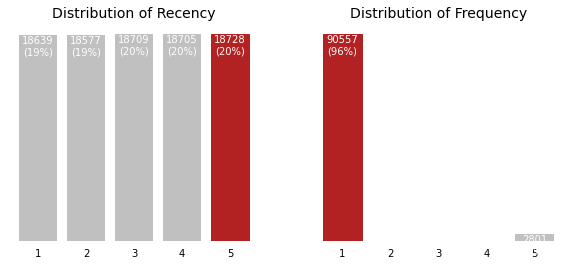

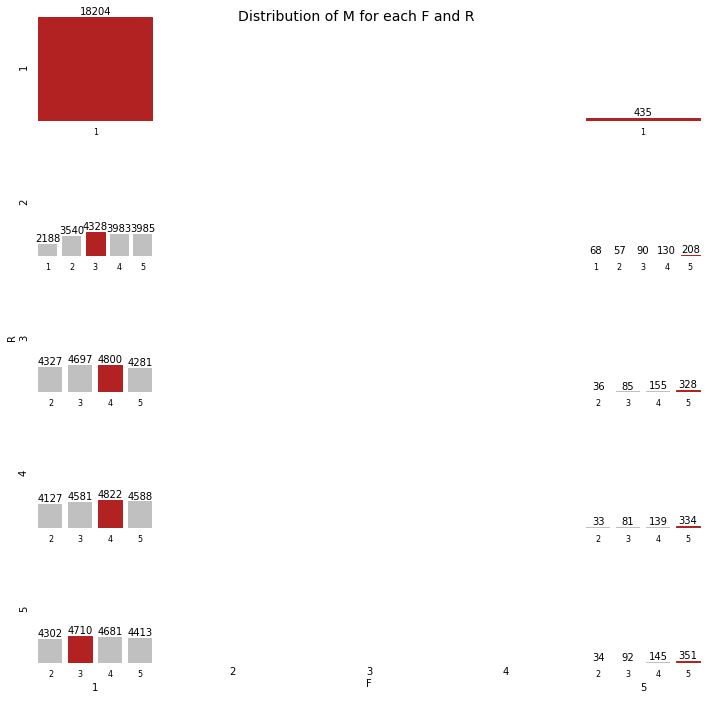

In [397]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [398]:
# Распределение времени от последней покупки пользователя до текущей даты показало примерно равномерное распределение 
# # Большая часть клиентов совершают покупки редко (96% клиентов имеют частоту 1)
# Глядя на денежное выражение, мы видим, что большое количество клиентов (18204) сделали разовую покупку давно. 
# Есть те, кто редко делает разовые покупки, а так же очень мало (351) тех, кто недавно купили и потрaтили больше всего

In [399]:
# построим общую диаграмму по данным

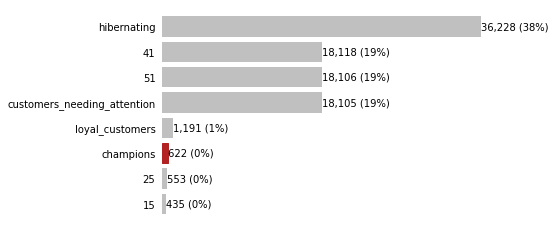

In [402]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [403]:
# Мы видим что наибольший процент клиентов (38%) - те, кто покупал давно и сделал мало заказов.
# 18% клиетнов недавние клиенты со средней частотой покупки
# 18% клиентов выше средней недавности, частоты и денежной стоимости
# 1% покупают на регулярной основе и реагируют на рекламные акции 
# менее 1% клиентов, которые сделали покупку недавно, покупают часто и трятят больше всего